## 필요라이브러리 로딩

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# 한글 지원, 음수부호설정
mpl.rcParams['font.family'] ='batang'
mpl.rcParams['axes.unicode_minus'] = False

## 와인 데이터셋 로딩

In [4]:
red = pd.read_csv('C:/k_digital/Sourcce/data/winequality-red.csv', sep=';')
white = pd.read_csv('C:/k_digital/Sourcce/data/winequality-white.csv', sep=';')

In [5]:
red.shape

(1599, 12)

In [6]:
white.shape

(4898, 12)

In [7]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
red.sample(5),white.sample(5)

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 692             8.6             0.490         0.51             2.0      0.422   
 776             6.9             0.765         0.18             2.4      0.243   
 785             9.9             0.350         0.41             2.3      0.083   
 1466            7.3             0.480         0.32             2.1      0.062   
 1543           11.1             0.440         0.42             2.2      0.064   
 
       free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 692                  16.0                  62.0  0.99790  3.03       1.17   
 776                   5.5                  48.0  0.99612  3.40       0.60   
 785                  11.0                  61.0  0.99820  3.21       0.50   
 1466                 31.0                  54.0  0.99728  3.30       0.65   
 1543                 14.0                  19.0  0.99758  3.25       0.57   
 
       alcohol  quality  
 692      

In [9]:
# 와인데이터를 합치기 위해 구분 컬럼 추가하기
red.insert(0, column = 'type', value = 'red')
red.shape # 컬럼 추가 확인

(1599, 13)

In [10]:
red.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
white.insert(0,column = 'type', value = 'white')
white.sample()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1655,white,7.8,0.28,0.49,1.3,0.046,27.0,142.0,0.9936,3.09,0.59,10.2,5


In [12]:
# 두 데이터 합치기
## concat() 이용하여 데이터 프레임 합치기
wine = pd.concat([red,white])
wine.shape

(6497, 13)

In [13]:
wine.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2874,white,5.4,0.230,0.36,1.50,0.030,74.0,121.0,0.98976,3.24,0.99,12.1,7
3048,white,7.1,0.170,0.43,1.30,0.023,33.0,132.0,0.99067,3.11,0.56,11.7,6
173,red,7.4,0.620,0.05,1.90,0.068,24.0,42.0,0.99610,3.42,0.57,11.5,6
498,white,5.7,0.335,0.34,1.00,0.040,13.0,174.0,0.99200,3.27,0.66,10.0,5
4629,white,5.6,0.240,0.34,2.00,0.041,14.0,73.0,0.98981,3.04,0.45,11.6,7
3132,white,6.3,0.170,0.32,4.20,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,6
1797,white,6.9,0.250,0.27,9.05,0.039,37.0,128.0,0.99360,3.27,0.34,11.3,8
1921,white,7.6,0.130,0.34,9.30,0.062,40.0,126.0,0.99660,3.21,0.39,9.6,5
4411,white,5.8,0.300,0.38,4.90,0.039,22.0,86.0,0.98963,3.23,0.58,13.1,7
584,white,6.6,0.250,0.30,1.60,0.046,32.0,134.0,0.99300,3.42,0.51,10.1,7


In [14]:
# 합친 데이터셋을 파일로 저장
wine.to_csv('C:/k_digital/Sourcce/data/wine.csv', index = False)

## Feature 분석
- fixed acidity : 고정 산도
- volatile acidity : 휘발성 산도
- citric acid : 시트르산
- residual sugar : 잔류 당분
- chlorides : 염화물
- free sulfur dioxide : 자유 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH
- sulphates : 황산염
- alcohol
- quality : 0 ~ 10(높을 수록 좋은 품질

## 데이터 탐색


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [16]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [17]:
wine.columns = wine.columns.str.replace(' ','_') # 공백을 _로 바꾸겠다는 명령
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [18]:
# describe : 기술통계량 
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [20]:
# 와인 품질 등급 확인 
wine.quality.unique() # 중복값 제거

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [23]:
# 와인 품질별 개수
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
# 와인의 등급과 
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [25]:
wine.groupby('type')['quality'].agg(['mean','std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


## t-검정(차이검정)

In [26]:
# t-검정
from scipy import stats
# 회귀, ols(R의 summary) glm(회귀분석 함수)
from statsmodels.formula.api import ols, glm
# 파이썬은 포뮬라식을 지원안해서 해당 패키지를 불러온거

In [30]:
# 레드의 등급과 화이트 등급의 차이가 있나?
redQuali = wine.loc[wine.type=='red', 'quality']
whiteQuali = white.quality
redQuali, whiteQuali

#데이터 갯수가 다르니깐 독립변수

(0       5
 1       5
 2       5
 3       6
 4       5
        ..
 1594    5
 1595    6
 1596    6
 1597    5
 1598    6
 Name: quality, Length: 1599, dtype: int64,
 0       6
 1       6
 2       6
 3       6
 4       6
        ..
 4893    6
 4894    5
 4895    6
 4896    7
 4897    6
 Name: quality, Length: 4898, dtype: int64)

- 단일표본 T검정: ttest-1samp(표본데이터, 귀무가설의 기대값)
- 독립표본 T검정: ttest_ind(data1, data2, equal_var=True)
- 대응표본 T검정: ttest_rel(data1, data2)
- 등분산 검정: ttest_ind(data1, data2)
- 정규분포 검정: shapiro(data)

In [31]:
# 독립표본 T검정, 정규분포를 따르고, 데이터의 독립성이 있어야하고 등분산을 구별해야함
stats.ttest_ind(redQuali, whiteQuali, equal_var = False) #등분산이 아니라서 False
#--> 귀무가설을 기각하고 대립가설을 채택함 따라서 와인의 품질이 타입별로 차이가 난다.

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [32]:
wine.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

- 선형회귀모델 이용
- OLS: Ordinary Least Squares 

In [38]:
formuls = 'quality ~ fixed_acidity + volatile_acidity + citric_acid +\
residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +\
density + pH + sulphates + alcohol'

# OLS: 선형회귀모델 이용
result = ols(formuls, data = wine).fit() # 학습

In [39]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:19:24   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
formuls = 'quality ~ fixed_acidity + volatile_acidity +\
residual_sugar + free_sulfur_dioxide + total_sulfur_dioxide +\
density + pH + sulphates + alcohol '

# OLS: 선형회귀모델 이용
result1 = ols(formuls, data = wine).fit() # 학습

In [41]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     296.7
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:19:57   Log-Likelihood:                -7217.8
No. Observations:                6497   AIC:                         1.446e+04
Df Residuals:                    6487   BIC:                         1.452e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               60.0409     11.645      5.156      0.000      37.212      82.870
fixed_acidity            0.0662      0.015      4.412      0.000       0.037       0.096
volatile_acidity        -1.3043      0.071    -18.445      0.000      -1.443      -1.166
residual_sugar           0.0453      0.005      9.024      0.000       0.035       0.055
free_sulfur_dioxide      0.0059      0.001      7.911      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -9.217      0.000      -0.003      -0.002
density                -59.4185     11.873     -5.004      0.000     -82.694     -36.143
pH                       0.4782      0.088      5.411      0.000       0.305       0.651
sulphates                0.7378      0.075      9.903      0.000       0.592       0.884
alcohol                  0.2647      0.017     15.886      0.000       0.232       0.297
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.085
Skew:                          -0.004   Prob(JB):                     2.56e-71
Kurtosis:                       4.096   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# 예측에 사용할 샘플 데이터 생성
sample1 = wine[wine.columns.difference(['quality','type'])]
sample1 = sample1[:5] # 컬럼명도 다 가져올거야
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [44]:
# 예측하기
sample_predict = result.predict(sample1)
sample_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [45]:
wine[:5] # 실제 등급과 예측값 비교를 위해서 

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
# 예측에 사용할 샘플 데이터 생성
data = {
    'fixed_acidity':[7.4,7.8,7.8,11.2,7.4], 'volatile_acidity':[0.70,0.88,0.76,0.28,0.70],
    'citric_acid':[0.00,0.00,0.04,0.56,0.00],'residual_sugar':[1.9,2.6,2.3,1.,1.9], 
    'chlorides':[0.076,0.098,0.092,0.075,0.076], 
    'free_sulfur_dioxide':[11.0,25.0,15.0,17.0,11.0],
    'total_sulfur_dioxide':[34.0,67.0,54.0,60.0,34.00], 
    'density':[0.9978,0.9968,0.9970,0.9980,0.9978], 'pH':[3.51,3.20,3.26,3.16,3.51], 
    'sulphates':[0.56,0.68,0.65,0.58,0.56], 'alcohol':[9.4,9.8,9.8,9.8,9.4]
}

sample2 = pd.DataFrame(data, columns=sample1.columns)
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.0,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [47]:
sample2_predict = result.predict(sample2)
sample2_predict

0    4.997607
1    4.924993
2    5.034663
3    5.641130
4    4.997607
dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


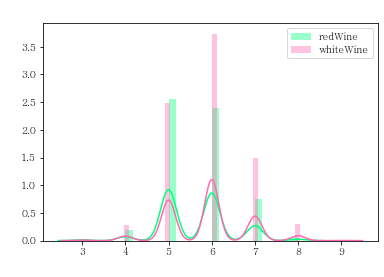

In [55]:
sns.distplot(redQuali, kde=True, color='springgreen', label='redWine')
sns.distplot(whiteQuali, kde=True, color='hotpink', label='whiteWine')
plt.legend()
plt.title('와인의 품질', color='white')
plt.xlabel('품질', color='white')
plt.ylabel('수치', color='white')
plt.show()

## 한 화면에 여러개의 그래프를 그리는 방법
- 캔버스 : figure()
- 화면 분할: subplot(rows, cols, idx)

In [58]:
# 그래프 스타일 부여
mpl.style.use('dark_background')
# ggplo, dark_background, fast, bmh

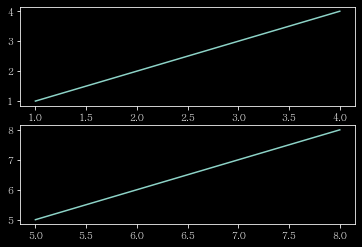

In [60]:
plt.figure() # figsize

# 2행 1열, 첫번쨰 그래프
plt.subplot(2,1,1)
plt.plot([1,2,3,4],[1,2,3,4])

# 2행 1열, 두번쨰 그래프
plt.subplot(2,1,2)
plt.plot([5,6,7,8],[5,6,7,8])

plt.show()

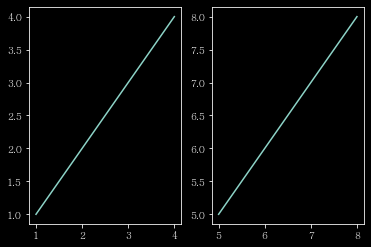

In [59]:
plt.figure() # figsize

# 1행 2열, 첫번쨰 그래프
plt.subplot(1,2,1)
plt.plot([1,2,3,4],[1,2,3,4])
# 1행 2열, 두번쨰 그래프
plt.subplot(1,2,2)
plt.plot([5,6,7,8],[5,6,7,8])

plt.show()

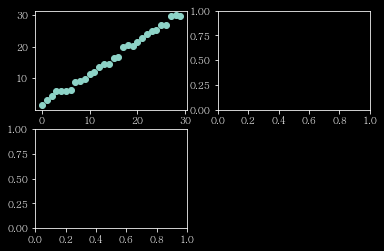

In [63]:
# 축값을 가져와서 위치 조정
#1. fig객체 만들기
fig = plt.figure() # 한화면에 여러개, figsize도화지 사이즈
#2. addsubplot으로 추가 설정 (위치)
ax1 = fig.add_subplot(2,2,1) # 2행 2열 짜리 공간의 첫번쨰 자리
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
#3. 그래프 그리기
ax1.scatter(np.arange(30), np.arange(30)+3*np.random.rand(30))

plt.show()